# Quiz Pekan - 3

Dataset-dataset berikut ini menunjukkan persentase fat, protein, dan food yang dikonsumsi dari setiap jenis makanan yang terdaftar. Beberapa bagian akhir dataset juga mencakup persentase obesitas(Obesity), kurang gizi(Undernourished), dan kasus COVID-19 yang Terkonfirmasi(Confirmed)/Kematian(Deaths)/Sembuh(Recovered)/Aktif(Active).

(Catatan: Semua data memiliki unit '%' (persen) kecuali Populasi, unit persen tersebut dihitung berdasarkan jumlah populasi).

Link Download:

[Food_Supply_Quantity_kg_Data.csv](https://drive.google.com/uc?export=download&id=1op0PFMMNglFtw8GVOF6HmomyAvgoY4jm)

[Protein_Supply_Quantity_Data.csv](https://drive.google.com/uc?export=download&id=19vFZ1clhjY0vyC8onnlYE63w1QpmB4oj)

[Fat_Supply_Quantity_Data.csv](https://drive.google.com/uc?export=download&id=1W1xIj5dGe9aLcg9cG6HVjlpdSqdlbue2)

[Supply_Food_Data_Descriptions.csv](https://drive.google.com/uc?export=download&id=1hG4_-D0doXkTU1e7sqZabpRXgCkHt5Hr)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Semua Data
df_food = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')
df_protein = pd.read_csv('Protein_Supply_Quantity_Data.csv')
df_fat = pd.read_csv('Fat_Supply_Quantity_Data.csv')
df_category = pd.read_csv('Supply_Food_Data_Descriptions.csv')

---

# Soal 1: Memisahkan kolom pada supply dataset antara kategori makanan dan bukan makanan

Teman-teman diminta untuk menampilkan list kolom-kolom pada supply DataFrame dengan ketentuan sebagai berikut:

*   all columns: list yang berisikan semua kolom pada supply DataFrame
*   supply columns: list yang berisikan semua kolom pada supply DataFrame berdasarkan kolom 'Categories' pada DataFrame df_category
*   non-supply columns: list yang berisikan semua kolom non-supply pada supply DataFrame


In [4]:
#view all columns in df_food

all_columns = df_food.columns.tolist()
print(f'All Columns : {all_columns} \n\n')

# view all value in categories column at the df_category dataframe

supply_columns = df_category['Categories'].tolist()
print(f'Supply Columns : {supply_columns} \n\n')

#view all columns in non-supply 

non_supply_columns = [col for col in all_columns if col not in supply_columns]
print(f'Non Supply Columns : {non_supply_columns}')

All Columns : ['Country', 'Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Unit (all except Population)'] 


Supply Columns : ['Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Vegetal Products'] 


Non Supply Columns : ['Country', 'Obesity', 'Unde

---

# Soal 2: Menggabungkan DataFrame



Gabungkan semua supply DataFrame dengan ketentuan tidak ada kolom dengan nama yang sama. Untuk kolom-kolom non-supply seperti tersebut di atas, memiliki nilai yang sama untuk setiap DataFrame, sehingga cukup ambil dari salah satu DataFrame. Sedangkan untuk kolom-kolom supply seperti tersebut di atas, setiap DataFrame (df_food, df_protein, df_fat) memiliki nilai yang berbeda, sehingga teman-teman perlu menambahkan suffix berdasarkan jenis supply DataFrame-nya, misalkan untuk kolom 'eggs' teman teman harus menambahkan suffix sehingga DataFrame gabungan memiliki kolom 'eggs_food', 'eggs_protein', dan 'eggs_fat'. Untuk mendapatkan gambaran lebih jelas, silahkan lihat pada expected output.

List kolom-kolom DataFrame hasil gabungan adalah sebagai berikut:


```
 ['Country', 'Alcoholic Beverages_food', 'Animal fats_food',
  'Animal Products_food', 'Aquatic Products, Other_food',
  'Cereals - Excluding Beer_food', 'Eggs_food', 'Fish, Seafood_food',
  'Fruits - Excluding Wine_food', 'Meat_food',
  'Milk - Excluding Butter_food', 'Miscellaneous_food', 'Offals_food',
  'Oilcrops_food', 'Pulses_food', 'Spices_food', 'Starchy Roots_food',
  'Stimulants_food', 'Sugar & Sweeteners_food', 'Sugar Crops_food',
  'Treenuts_food', 'Vegetable Oils_food', 'Vegetables_food',
  'Vegetal Products_food', 'Alcoholic Beverages_protein',
  'Animal fats_protein', 'Animal Products_protein',
  'Aquatic Products, Other_protein', 'Cereals - Excluding Beer_protein',
  'Eggs_protein', 'Fish, Seafood_protein',
  'Fruits - Excluding Wine_protein', 'Meat_protein',
  'Milk - Excluding Butter_protein', 'Miscellaneous_protein',
  'Offals_protein', 'Oilcrops_protein', 'Pulses_protein',
  'Spices_protein', 'Starchy Roots_protein', 'Stimulants_protein',
  'Sugar & Sweeteners_protein', 'Sugar Crops_protein', 'Treenuts_protein',
  'Vegetable Oils_protein', 'Vegetables_protein',
  'Vegetal Products_protein', 'Alcoholic Beverages_fat',
  'Animal fats_fat', 'Animal Products_fat', 'Aquatic Products, Other_fat',
  'Cereals - Excluding Beer_fat', 'Eggs_fat', 'Fish, Seafood_fat',
  'Fruits - Excluding Wine_fat', 'Meat_fat',
  'Milk - Excluding Butter_fat', 'Miscellaneous_fat', 'Offals_fat',
  'Oilcrops_fat', 'Pulses_fat', 'Spices_fat', 'Starchy Roots_fat',
  'Stimulants_fat', 'Sugar & Sweeteners_fat', 'Sugar Crops_fat',
  'Treenuts_fat', 'Vegetable Oils_fat', 'Vegetables_fat',
  'Vegetal Products_fat', 'Obesity', 'Undernourished', 'Confirmed',
  'Deaths', 'Recovered', 'Active', 'Population',
  'Unit (all except Population)']
```

In [5]:
# Hint
df_non_supply_new = df_food[non_supply_columns]
df_food_new = df_food[['Country']+supply_columns]
df_protein_new = df_protein[['Country']+supply_columns]
df_fat_new = df_fat[['Country']+supply_columns]

In [6]:
# Selanjutnya gabungkan dataset pada hint di atas dengan menambahkan suffix berbeda untuk setiap supply dataset menggunakan pd.merge
# Code here

df = pd.merge(df_food_new, df_protein_new, on='Country', how = 'outer', suffixes = ('_food', '_protein'))

fat_new_cols = [col + '_fat' if col != 'Country' else col for col in df_fat_new.columns]
df_fat_new.columns = fat_new_cols

df = pd.merge(df, df_fat_new, how = 'outer', on = 'Country')
df = pd.merge(df, df_non_supply_new, how = 'outer')
df

,Country,Alcoholic Beverages_food,Animal fats_food,Animal Products_food,"Aquatic Products, Other_food",Cereals - Excluding Beer_food,Eggs_food,"Fish, Seafood_food",Fruits - Excluding Wine_food,Meat_food,...,Vegetables_fat,Vegetal Products_fat,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,0.3593,28.3684,4.5,29.8,0.094302,0.003298,0.065531,0.025473,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,0.6503,17.9998,22.3,6.2,0.194468,0.005849,0.106342,0.082276,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,0.5145,35.5857,26.6,3.9,0.070936,0.002775,0.048288,0.019873,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,0.1231,34.7010,6.8,25,0.003687,0.000169,0.001418,0.002100,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,0.2469,22.2995,19.1,NaN,0.092857,0.003061,0.068367,0.021429,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,0.1851,33.6855,25.2,21.2,0.070539,0.000607,0.039811,0.030120,28645000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,0.6373,16.7548,2.1,9.3,0.000645,0.000006,0.000388,0.000252,96209000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,0.1667,37.4535,14.1,38.9,0.005814,0.001666,0.002890,0.001257,29826000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,0.1567,40.3939,6.5,46.7,0.034525,0.000925,0.024440,0.009160,18384000.0,%


Expected output (kolom tidak semua ditampilkan):
![Expected Output:](https://drive.google.com/uc?id=1_thZs6C82RhDFqWo5yGuZV_OWhgvqsnu)

---

# Soal 3: Sorting dan Filtering

Dari DataFrame hasil penggabungan pada Soal 2 (atau gunakan salah satu supply DataFrame karena kolom nilai non-supply memiliki nilai yang sama), kemudian urutkan data (sort) berdasarkan kolom kematian ('Deaths') dari yang terbesar. Setelah itu lakukan perintah berikut:

- Print data hasil sorting
- Urutan ke berapakah Indonesia berdasarkan tingkat kematian akibat COVID-19 setelah diurutkan dari yang terbesar? Gunakan code mendapatkan nilainya! 
- Berapa persen dari terkonfirmasi jumlah kematian akibat COVID-19 di Indonesia? Hitung jumlah orang yang meninggal! Gunakan code mendapatkan nilainya! #hint: jumlah orang yang meninggal = populasi * kematian --> jangan lupa ada yang masih dalam persen


In [7]:
# Urutkan (sorting) dan print hasil sorting
# Code here

df_sort_death = df.sort_values(by='Deaths', ascending=False, ignore_index=True)
df_sort_death

,Country,Alcoholic Beverages_food,Animal fats_food,Animal Products_food,"Aquatic Products, Other_food",Cereals - Excluding Beer_food,Eggs_food,"Fish, Seafood_food",Fruits - Excluding Wine_food,Meat_food,...,Vegetables_fat,Vegetal Products_fat,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Belgium,5.3730,0.8559,17.7279,0.0010,6.6704,0.6487,1.1325,4.1623,3.2370,...,0.2982,23.2622,24.5,<2.5,0.606591,0.085497,0.152757,0.368337,11515000.0,%
1,United Kingdom,5.2632,0.2754,18.8798,0.0006,6.5412,0.6210,1.0911,4.9551,4.4181,...,0.2127,24.1332,29.5,<2.5,0.456103,0.068919,0.002150,0.385034,67160000.0,%
2,Peru,3.8623,0.0316,8.6638,0.0014,11.8140,0.6431,1.7993,8.5783,1.7540,...,0.4523,31.9598,19.1,9.7,1.306514,0.059755,0.896256,0.350503,32824000.0,%
3,Spain,5.3152,0.2357,18.3382,0.0011,6.0548,0.7321,2.2646,4.8332,5.3456,...,0.2611,30.4731,27.1,<2.5,0.605693,0.059714,0.315684,NaN,47635000.0,%
4,Italy,3.1892,0.2834,19.0329,0.0005,8.5417,0.6247,1.5816,6.0207,4.2963,...,0.2277,28.1306,22.9,<2.5,0.411420,0.058302,0.332460,0.020658,60296000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,New Caledonia,5.0363,0.0821,11.7818,0.0804,8.5840,0.7494,2.0361,5.5855,5.8687,...,0.1887,27.7282,NaN,7.1,NaN,NaN,NaN,NaN,295000.0,%
166,Samoa,1.4236,0.2262,11.1630,0.1236,3.6768,0.1314,2.7788,10.7845,5.7993,...,0.0431,28.3194,45.5,2.7,NaN,NaN,NaN,NaN,200000.0,%
167,Solomon Islands,0.8298,0.1038,3.8504,0.0121,9.0233,0.0826,2.2840,3.2798,0.8897,...,0.0785,36.3351,20.5,8.9,NaN,NaN,NaN,NaN,715000.0,%
168,Turkmenistan,0.5038,0.3373,16.0611,0.0000,14.8029,0.5139,0.2137,4.1441,4.3767,...,0.4459,17.3085,17.5,5.4,NaN,NaN,NaN,NaN,6031000.0,%


In [8]:
# Urutan ke berapakah Indonesia
# Code here

list(df_sort_death[df_sort_death['Country']== 'Indonesia'].index)[0]+1

84

In [9]:
# Berapa persen jumlah kematian di Indonesia? Berapa Jumlahnya?
# Code here
meninggal_persen = list(df_sort_death[df_sort_death['Country'] == 'Indonesia'].Deaths)[0]
meninggal = list(df_sort_death[df_sort_death['Country'] == 'Indonesia'].Deaths * df_sort_death[df_sort_death['Country'] == 'Indonesia'].Population * 0.01)[0]

print(f'Jumlah yang meninggal di Indonesia ada {round(meninggal_persen, 10)} % dari jumlah populasi.')   #10 digit
print(f'Jumlah yang meninggal di Indonesia ada {round(meninggal)} orang.')

Jumlah yang meninggal di Indonesia ada 0.0019268489 % dari jumlah populasi.
Jumlah yang meninggal di Indonesia ada 5236 orang.


---

# Soal 4: Binning, Grouping, dan Aggregating data

Lakukan binning pada kolom terkonfirmasi (Confirmed) COVID-19 dari DataFrame df_fat menjadi 5 bagian (q=5). Teman-teman dapat menggunakan fungsi qcut untuk melakukan bininng ini. Masukan data hasil binning tersebut menjadi kolom baru pada DataFrame df_fat. Beri nama kolom tersebut dengan 'Confirmed Category'. Berikan label 'Sangat Tidak Banyak', 'Tidak Banyak', 'Sedang', 'Cukup Banyak', 'Sangat Banyak'.

Baca dokumentasi berikut untuk fungsi qcut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

Kemudian lakukan perintah-perintah berikut:
- Buat DataFrame baru yang berisi data grouping berdasarkan kolom hasil bininng atau kolom 'Confirmed Category'. 
- Lakukan grouping hanya pada kolom 'Obesity', 'Meat', 'Fruits - Excluding Wine', 'Fish, Seafood', 'Animal Products', 'Vegetal Products' saja.
- Kemudian aggregate dengan fungsi mean. (df_baru = df_fat.groupby(...).mean())
- Save DataFrame hasil binning, grouping, dan aggregating ke dalam file csv.

In [10]:
# Lakukan binning pada kolom terkonfirmasi untuk DataFrame df_fat
labels = ['Sangat Tidak Banyak', 'Tidak Banyak', 'Sedang', 'Cukup Banyak', 'Sangat Banyak']

# Code here
df_fat['Confirmed Category'] = pd.qcut(df_fat['Confirmed'], q=5, labels=labels)

In [11]:
# Lakukan grouping pada kolom hasil binning ('Confirmed Category'), kemudian aggregate menggunakan fungsi mean
cols = ['Obesity', 'Meat', 'Fruits - Excluding Wine', 'Fish, Seafood', 'Animal Products', 'Vegetal Products']

# Code here
groupby_confirmed = df_fat.groupby('Confirmed Category')[cols].mean()
groupby_confirmed

,Obesity,Meat,Fruits - Excluding Wine,"Fish, Seafood",Animal Products,Vegetal Products
Confirmed Category,,,,,,
Sangat Tidak Banyak,10.618750,9.259621,0.721521,0.964779,16.326836,33.672833
Tidak Banyak,16.584375,8.589766,0.421303,0.883716,18.621153,31.379200
Sedang,18.843750,8.899756,0.526681,0.718938,21.226191,28.775119
Cukup Banyak,22.493750,9.619678,0.500125,0.617231,23.450781,26.549012
Sangat Banyak,23.921875,10.469913,0.578425,0.846991,24.233647,25.766234


Expected output:
![Expected Output:](https://drive.google.com/uc?id=1jw1uGaSHaKlY9ILghmTTlO9NqhQpq8Ad)

In [12]:
# Save DataFrame hasil binning, grouping, dan aggregating

groupby_confirmed.to_csv('groupby_confirmed.csv')

---

# Soal 5: Bar plot

Gunakan data grouping pada soal sebelumnya untuk melakukan visualisasi. Jika kalian tidak dapat menyelesaikan soal tersebut, maka silahkan [download](https://drive.google.com/uc?export=download&id=1l5wFAKKShPQQvIe0rQ7C4Xog9tt_WDN0) data berikut yang merupakan hasil dari data grouping soal 4.

Normalisasi data hasil grouping tersebut dengan rumus min-max normalisasi seperti rumus berikut ini. Kemudian buatlah grouping Visualization dengan berplot, visualisasikan data column 'Obesity', 'Fruits - Excluding Wine', 'Fish, Seafood', 'Animal Products' dan 'Vegetal Products'. 

\begin{equation*}
 X_{norm} = \dfrac{X - X_{min}}{X_{max} - X_{min}}
\end{equation*}


In [13]:
# Gunakan DataFrame hasil grouping soal 4 atau read data hasil download jika tidak dapat mengerjakan soal 4
df = groupby_confirmed

# Atau

df = pd.read_csv('groupby_confirmed.csv').set_index('Confirmed Category')

# Lihat df dan pastikan sesuai dengan expected output pada soal 4
display(df)

,Obesity,Meat,Fruits - Excluding Wine,"Fish, Seafood",Animal Products,Vegetal Products
Confirmed Category,,,,,,
Sangat Tidak Banyak,10.618750,9.259621,0.721521,0.964779,16.326836,33.672833
Tidak Banyak,16.584375,8.589766,0.421303,0.883716,18.621153,31.379200
Sedang,18.843750,8.899756,0.526681,0.718938,21.226191,28.775119
Cukup Banyak,22.493750,9.619678,0.500125,0.617231,23.450781,26.549012
Sangat Banyak,23.921875,10.469913,0.578425,0.846991,24.233647,25.766234


In [14]:
# Lakukan normalisasi pada DataFrame df
# Code here
df_norm = (df - df.min()) / (df.max()) - df.min()

# Lihat df_norm dan pastikan sesuai dengan expected output
display(df_norm)

,Obesity,Meat,Fruits - Excluding Wine,"Fish, Seafood",Animal Products,Vegetal Products
Confirmed Category,,,,,,
Sangat Tidak Banyak,-10.618750,-8.525787,-0.005213,-0.256996,-16.326836,-25.531428
Tidak Banyak,-10.369371,-8.589766,-0.421303,-0.341018,-16.232162,-25.599543
Sedang,-10.274922,-8.560158,-0.275253,-0.511812,-16.124665,-25.676878
Cukup Banyak,-10.122342,-8.491397,-0.312059,-0.617231,-16.032867,-25.742988
Sangat Banyak,-10.062643,-8.410189,-0.203538,-0.379084,-16.000562,-25.766234


Expected output:
![Expected Output:](https://drive.google.com/uc?id=1BFzcOFHbZMnw0wqbwl8K6IEiVmurqG84)

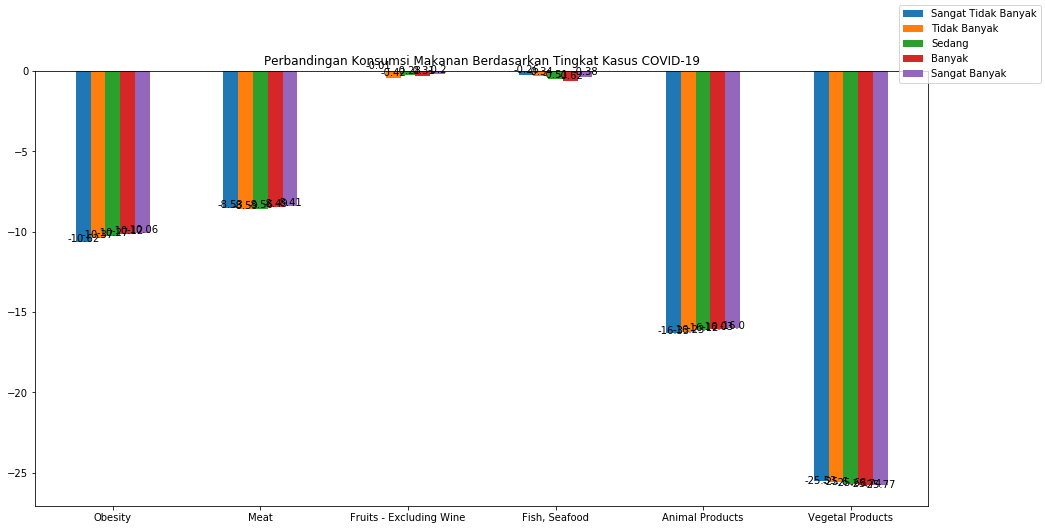

In [19]:
# Buat bar plot dari df_norm sesuai dengan expected output
# Code here

n_c = len(df_norm.columns)
x = np.arange(0, n_c*2, 2)

fig, ax = plt.subplots(figsize=(16,8))
bar1 = ax.bar(x, df_norm.iloc[0, :], width=0.2, label='Sangat Tidak Banyak')
bar2 = ax.bar(x+0.2, df_norm.iloc[1, :], width=0.2, label='Tidak Banyak')
bar3 = ax.bar(x+0.4, df_norm.iloc[2, :], width=0.2, label='Sedang')
bar4 = ax.bar(x+0.6, df_norm.iloc[3, :], width=0.2, label='Banyak')
bar5 = ax.bar(x+0.8, df_norm.iloc[4, :], width=0.2, label='Sangat Banyak')

ax.set_xticklabels([0]+df_norm.columns.tolist())
ax.set_title('Perbandingan Konsumsi Makanan Berdasarkan Tingkat Kasus COVID-19')


# Untuk menambahkan label di atas barplot lihat https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                str(round(height, 2)),
                ha='center', va='bottom')

plt.xticks([k + 2*0.2 for k in x], [x for x in df_norm.columns])

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)

fig.legend()
plt.show()

Expected output:
![Expected Output:](https://drive.google.com/uc?id=11x5OMAB8mbZurD0qntxcwOcWYCQSegy8)


---

# Soal 6: Scatter plot


Buatlah visualisasi scatter plot dari df_food antara Supply Sayuran ('Vegetal Products') dan persentase terkonfirmasi ('Confirmed') COVID-19 sesuai expected output dengan ketentuan berikut:


* Gunakan kolom persentase kematian ('Death') sebagai ukuran pointnya kalikan suatu angka yang cukup besar agar terlihat.
    
* Gunakan kolom persentase produk hewani ('Animal Products') sebagai warna point, berikan colormap 'viridis'.

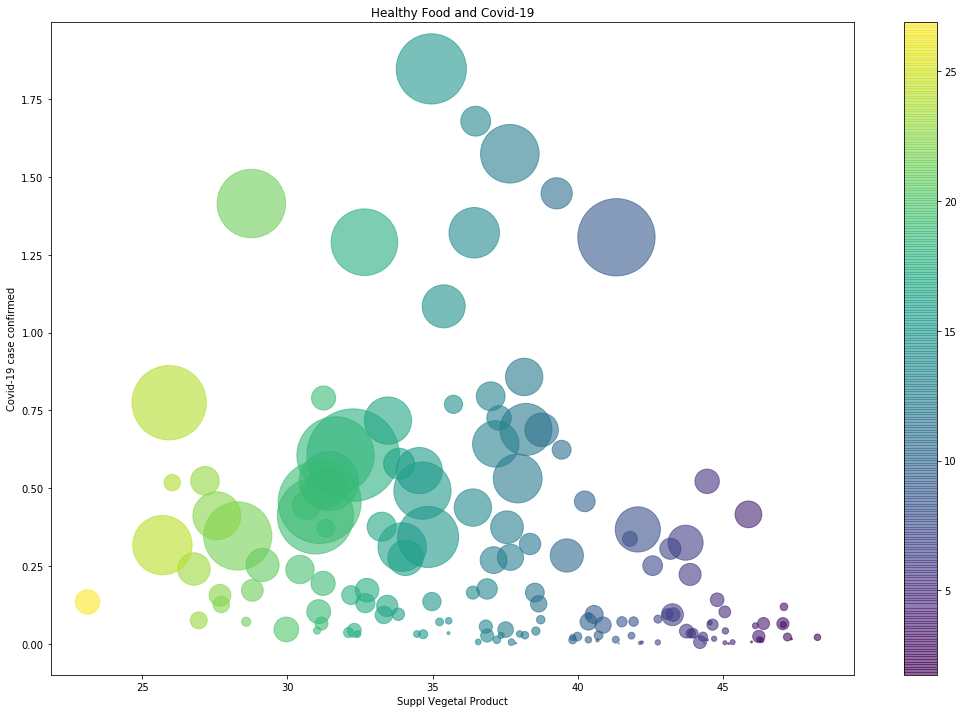

In [18]:
fig, ax = plt.subplots(figsize=(18, 12))

# Code here

mappbar = ax.scatter(df_food['Vegetal Products'], df_food['Confirmed'], s=df_food['Deaths']*100000, alpha=0.6,cmap ='viridis', c=df_food['Animal Products'])

fig.colorbar(mappbar)
ax.set_xlabel('Suppl Vegetal Product')
ax.set_ylabel('Covid-19 case confirmed')
ax.set_title('Healthy Food and Covid-19')


plt.show()

Expected output:
![Expected Output:](https://drive.google.com/uc?id=1wJh3tfkPbrkf3_F73RW0kABBt_NO8q53)